In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy


In [3]:
def set_limits(upper_bound:int,right_bound:int)->tuple[int,int]:
    return (upper_bound,right_bound)

x,y = set_limits(1,2)

y

2

/var/folders/zy/_wdf8zn51qq_j543bvqj82x40000gn/T/ipykernel_7401/3245046627.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


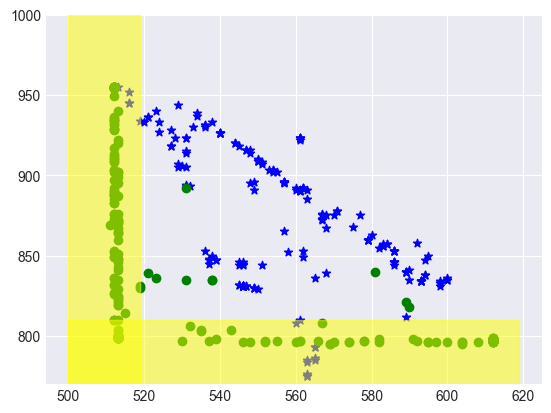

In [4]:
data_bad = pandas.read_csv('Coordinate_path_bad.csv')
data_good = pandas.read_csv('Coordinate_path.csv')
plt.style.use('seaborn-darkgrid')
for idx,row in data_bad.iterrows():
    x = int(row.X)-60
    y = int(row.Y)+32
    plt.scatter(x,y,c='blue',marker='*')
for idx,row in data_good.iterrows():
    x = int(row.X)
    y = int(row.Y)
    plt.scatter(x,y,c='Green')

x_r,y = set_limits(520,770)

x = numpy.arange(500,x_r,1)
x1 = numpy.arange(500,620,1)

plt.fill_between(x,1000,color = 'yellow',alpha = 0.5)
plt.fill_between(x1,810,color = 'yellow',alpha = 0.5)
plt.ylim((y,1000))
plt.show()


In [ ]:
with pandas.option_context(
    'display.max_rows',None
):
    display(velocity)

In [9]:
data = pandas.read_csv('/Users/akshitshishodia/tracker/test/Coordinate_path.csv')
velocity = pandas.DataFrame(columns=['velocity','time','direction'])

for i in range(0,323):
    delta_y = data.loc[i+1]['Y']-data.loc[i]['Y']
    delta_x = data.loc[i+1]['X']-data.loc[i]['X']
    delta_t = data.loc[i+1]['TIME']-data.loc[i]['TIME']
    pixel_dist = pow(pow(delta_x,2)+pow(delta_y,2),0.5)

    real_dist = pixel_dist/3.2
    vel = (real_dist/delta_t)   
    if(delta_x>0):
        dir = 1
    else:
        dir = -1
    velocity = velocity.append({'velocity':vel,'time':data.loc[i]['TIME'],'direction':dir},ignore_index = True)
    





/var/folders/zy/_wdf8zn51qq_j543bvqj82x40000gn/T/ipykernel_7401/1486112933.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  velocity = velocity.append({'velocity':vel,'time':data.loc[i]['TIME'],'direction':dir},ignore_index = True)
/var/folders/zy/_wdf8zn51qq_j543bvqj82x40000gn/T/ipykernel_7401/1486112933.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  velocity = velocity.append({'velocity':vel,'time':data.loc[i]['TIME'],'direction':dir},ignore_index = True)
/var/folders/zy/_wdf8zn51qq_j543bvqj82x40000gn/T/ipykernel_7401/1486112933.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  velocity = velocity.append({'velocity':vel,'time':data.loc[i]['TIME'],'direction':dir},ignore_index = True)
/var/folders/zy/_wdf8zn51

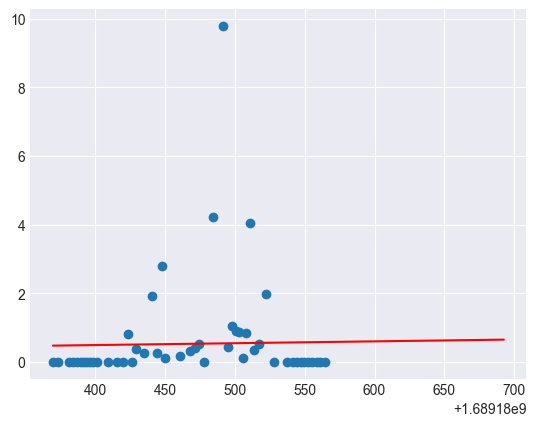

In [88]:
plt.scatter(velocity.time[:50],velocity.velocity[:50])
slope = reg.coef_
intercept = reg.intercept_

ve = slope*x + intercept

ve = ve.flatten()

plt.plot(x,ve,c="red")


In [98]:
x1.flatten().shape

(323,)

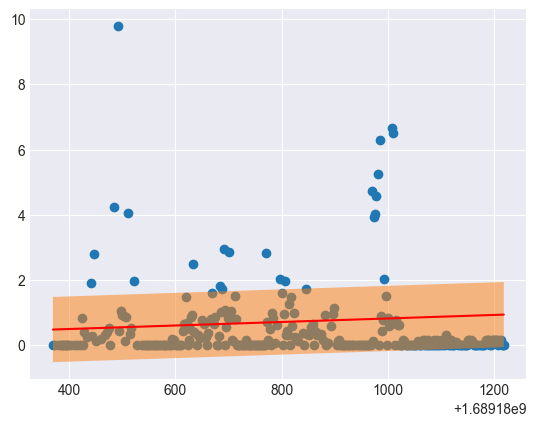

In [101]:
plt.scatter(velocity.time,velocity.velocity)

x1 = numpy.array(velocity.time.to_list())
x1 = x1.reshape((-1,1)).flatten()

f1 = slope*x1 + (intercept+1)
f2 = slope*x1 + (intercept-1)
ve = slope*x1 + intercept

ve = ve.flatten()
f1 = f1.flatten()
f2 = f2.flatten()

plt.plot(x1,ve,c="red")
plt.fill_between(x1,f1,f2,alpha = 0.5)

plt.show()




In [87]:
x = numpy.array(velocity.time[:100].to_list())
y = numpy.array(velocity.velocity[:100].to_list())
x = x.reshape((-1,1))
y=  y.reshape((-1,1))
reg.fit(x,y)

LinearRegression()

In [55]:
slope = reg.coef_
intercept = reg.intercept_

ve = slope*x + intercept

plt.plot(x,y)


In [41]:
1.591956	1.689181e+09

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.82301203,
       0.        , 0.39709242, 0.26285366, 1.92290316, 0.27752584,
       2.80344126, 0.12615398, 0.18143895, 0.32781836, 0.40414618,
       0.51998213, 0.        , 4.23931708, 9.78225906, 0.4306263 ,
       1.06233621, 0.91505213, 0.88252264, 0.13328813, 0.86159768,
       4.04678726, 0.34071155, 0.51661993, 1.98275447, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20235358, 0.15182122, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.44788833, 0.65374085, 1.47108995,
       0.68004486, 0.        , 0.15679628, 0.48423333, 0.85194

In [84]:
def anomaly_detect(data:pandas.DataFrame,range:tuple,thresh:int)->bool:
    anomaly_counter = 0
    x_right,y_upper = range

    for _,row in data.iterrows():
        c1 = int(row.X)<x_right and int(row.Y)<1000
        c2 = int(row.Y)<y_upper and int(row.X)<620 and int(row.X)>500
        if c1 or c2:
            continue
        else:
            anomaly_counter+=1
    if anomaly_counter>=thresh:
        return True
    else:
        return False
        

t = anomaly_detect(data_bad,(520,820),20)

In [85]:
t

True

In [51]:
with pandas.option_context(
    'display.max_rows',None
):
    display(data)



,Unnamed: 0,TIME,X,Y
0,0,1.689236e+09,610.0,877.0
1,1,1.689236e+09,614.0,870.0
2,2,1.689236e+09,614.0,871.0
3,3,1.689236e+09,617.0,864.0
4,4,1.689236e+09,620.0,859.0
5,5,1.689236e+09,622.0,860.0
6,6,1.689236e+09,622.0,860.0
7,7,1.689236e+09,621.0,891.0
8,8,1.689236e+09,630.0,843.0
9,9,1.689236e+09,627.0,841.0


520

In [52]:
x_r

520